<a href="https://colab.research.google.com/github/Ravindra1972/Anaytics-in-finance-using-Python/blob/main/Asset_allocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd


In [ ]:
# %matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
pip install quantstats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 814.8 kB/s eta 0:00:00


In [4]:
import quantstats as qs

In [5]:
ASSETS = ["META", "AMZN", "AAPL", "NFLX", "GOOG"]
n_assets = len(ASSETS)



In [13]:
prices_df = yf.download(ASSETS,
                        start="2020-01-01",
                        end="2023-12-12")
prices_df.to_csv('C:\\Users\\Dell\\Desktop\\Python Finance\\prices_df.csv')


[*********************100%%**********************]  5 of 5 completed


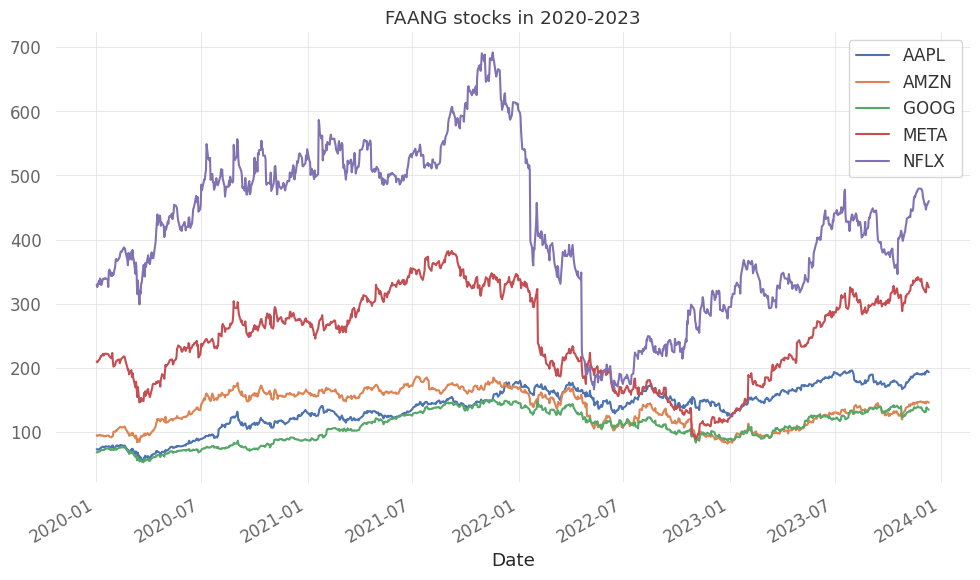

In [9]:
prices_df["Adj Close"].plot(title="FAANG stocks in 2020-2023")

sns.despine()
plt.tight_layout()

In [14]:
returns = prices_df["Adj Close"].pct_change().dropna()
returns



AAPL      AMZN      GOOG      META      NFLX
Date                                                        
2020-01-03 -0.009722 -0.012139 -0.004907 -0.005291 -0.011855
2020-01-06  0.007968  0.014886  0.024657  0.018834  0.030469
2020-01-07 -0.004703  0.002092 -0.000624  0.002164 -0.015127
2020-01-08  0.016086 -0.007809  0.007880  0.010138  0.025729
2020-01-09  0.021241  0.004799  0.011044  0.014311 -0.010611
...              ...       ...       ...       ...       ...
2023-12-05  0.021063  0.014085  0.013473 -0.005406  0.002754
2023-12-06 -0.005687 -0.016068 -0.007251 -0.002639 -0.018499
2023-12-07  0.010139  0.016330  0.053412  0.028792  0.011797
2023-12-08  0.007412  0.003676 -0.013073  0.018862  0.003894
2023-12-11 -0.012927 -0.010379 -0.014198 -0.022449  0.013509

[992 rows x 5 columns]

In [15]:
portfolio_weights = n_assets * [1 / n_assets]


In [16]:
portfolio_returns = pd.Series(
    np.dot(portfolio_weights, returns.T),
    index=returns.index
)

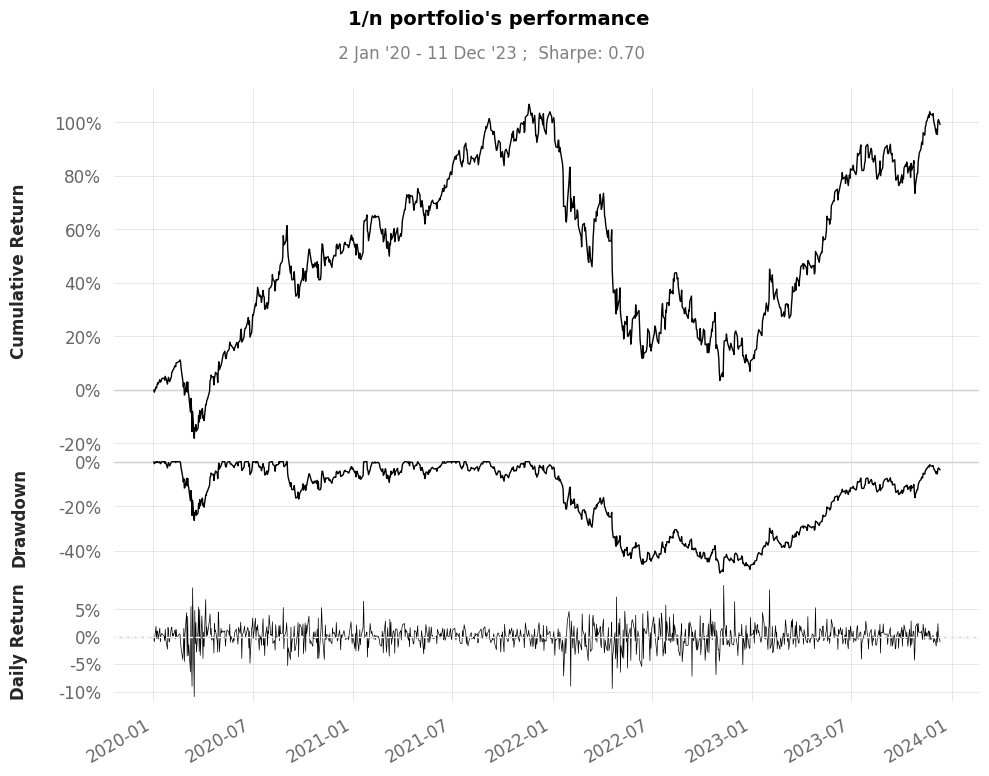

In [17]:
qs.plots.snapshot(portfolio_returns,
                  title="1/n portfolio's performance",
                  grayscale=True)

In [18]:
qs.reports.metrics(portfolio_returns,
                   benchmark="SPY",
                   mode="basic")

[*********************100%%**********************]  1 of 1 completed
                    Benchmark (SPY)    Strategy
------------------  -----------------  ----------
Start Period        2020-01-03         2020-01-03
End Period          2023-12-11         2023-12-11
Risk-Free Rate      0.0%               0.0%
Time in Market      100.0%             100.0%

Cumulative Return   43.29%             100.95%
CAGR﹪              6.51%              13.01%

Sharpe              0.52               0.7
Prob. Sharpe Ratio  84.43%             91.73%
Sortino             0.72               0.99
Sortino/√2          0.51               0.7
Omega               1.13               1.13

Max Drawdown        -34.1%             -49.94%
Longest DD Days     707                750

Gain/Pain Ratio     0.1                0.13
Gain/Pain (1M)      0.52               0.85

Payoff Ratio        0.9                0.88
Profit Factor       1.1                1.13
Common Sense Ratio  1.04               1.07
CPC Index       

In [19]:
qs.extend_pandas()

In [20]:
print(f"Sharpe ratio: {portfolio_returns.sharpe():.2f}")
print(f"Sortino ratio: {portfolio_returns.sortino():.2f}")

Sharpe ratio: 0.70
Sortino ratio: 0.98


In [21]:
[method for method in dir(qs.stats) if method[0] != "_"]

['adjusted_sortino',
 'autocorr_penalty',
 'avg_loss',
 'avg_return',
 'avg_win',
 'best',
 'cagr',
 'calmar',
 'common_sense_ratio',
 'comp',
 'compare',
 'compsum',
 'conditional_value_at_risk',
 'consecutive_losses',
 'consecutive_wins',
 'cpc_index',
 'cvar',
 'distribution',
 'drawdown_details',
 'expected_return',
 'expected_shortfall',
 'exposure',
 'gain_to_pain_ratio',
 'geometric_mean',
 'ghpr',
 'greeks',
 'implied_volatility',
 'information_ratio',
 'kelly_criterion',
 'kurtosis',
 'max_drawdown',
 'monthly_returns',
 'omega',
 'outlier_loss_ratio',
 'outlier_win_ratio',
 'outliers',
 'payoff_ratio',
 'pct_rank',
 'probabilistic_adjusted_sortino_ratio',
 'probabilistic_ratio',
 'probabilistic_sharpe_ratio',
 'probabilistic_sortino_ratio',
 'profit_factor',
 'profit_ratio',
 'r2',
 'r_squared',
 'rar',
 'recovery_factor',
 'remove_outliers',
 'risk_of_ruin',
 'risk_return_ratio',
 'rolling_greeks',
 'rolling_sharpe',
 'rolling_sortino',
 'rolling_volatility',
 'ror',
 'seren

[*********************100%%**********************]  1 of 1 completed

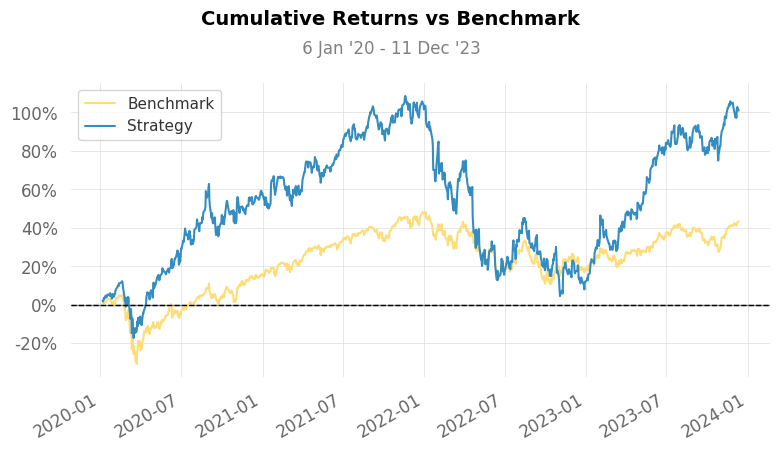

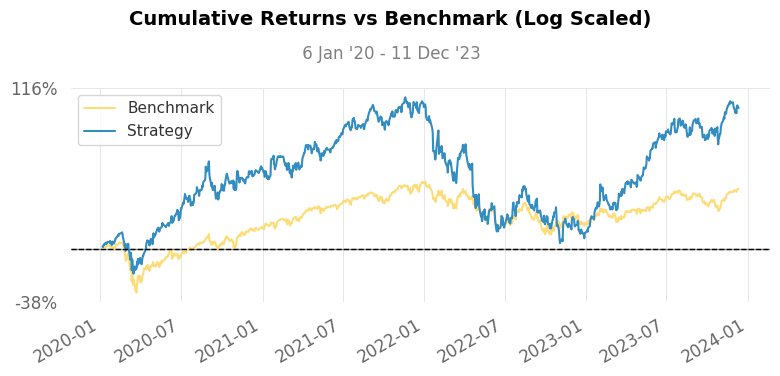

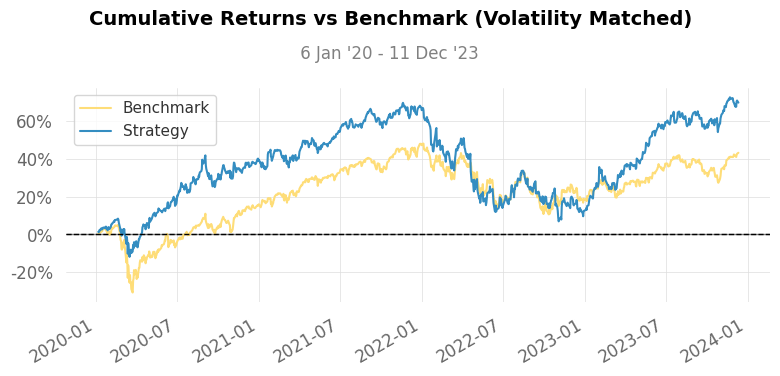

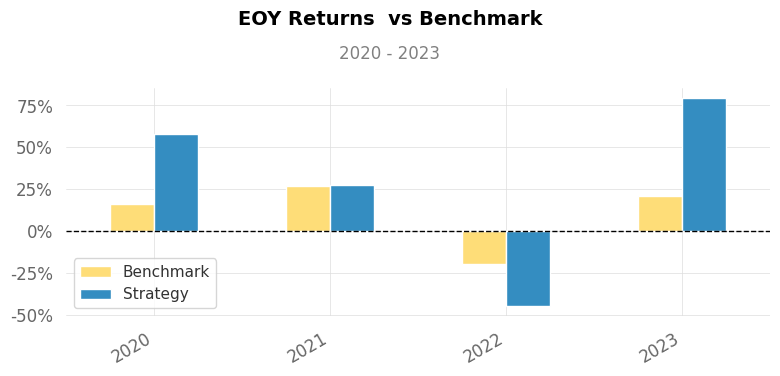

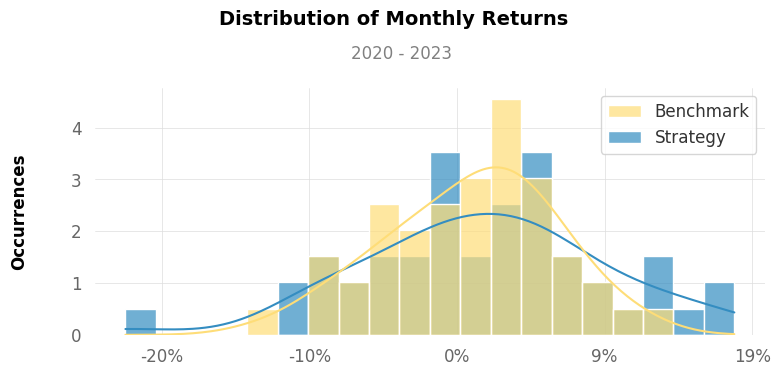

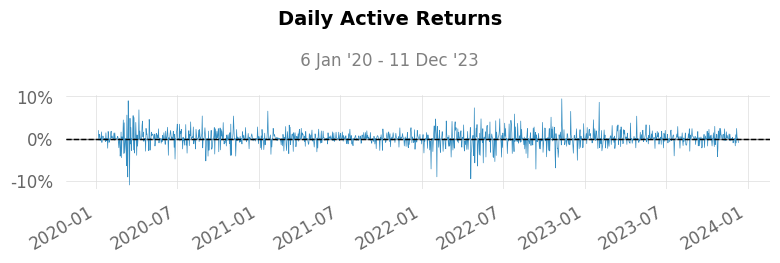

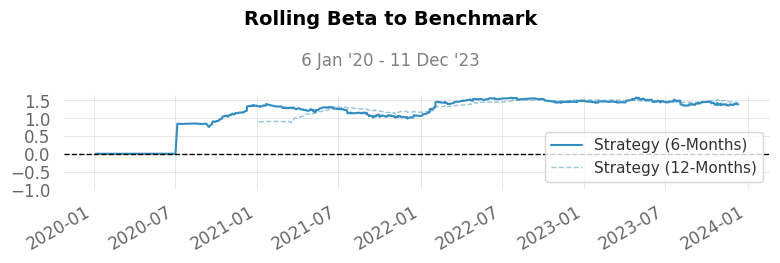

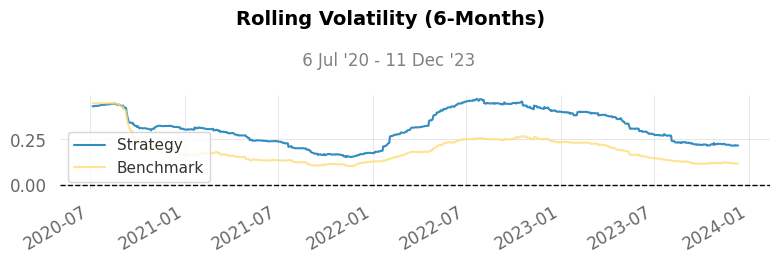

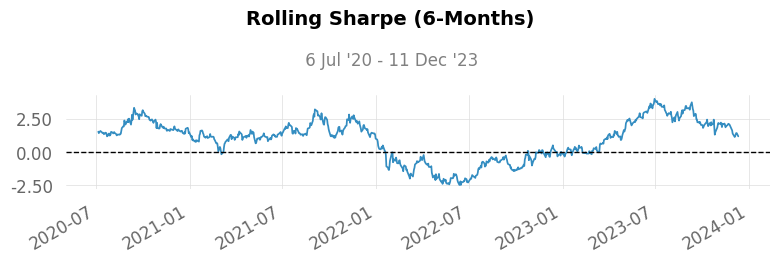

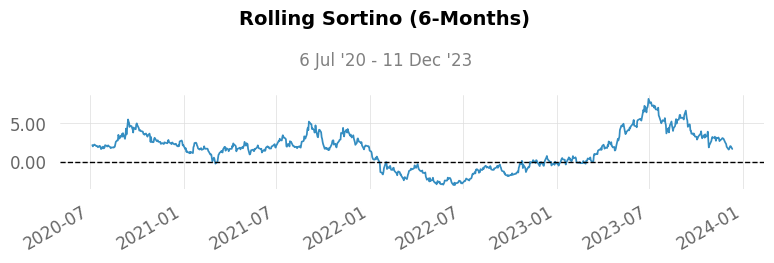

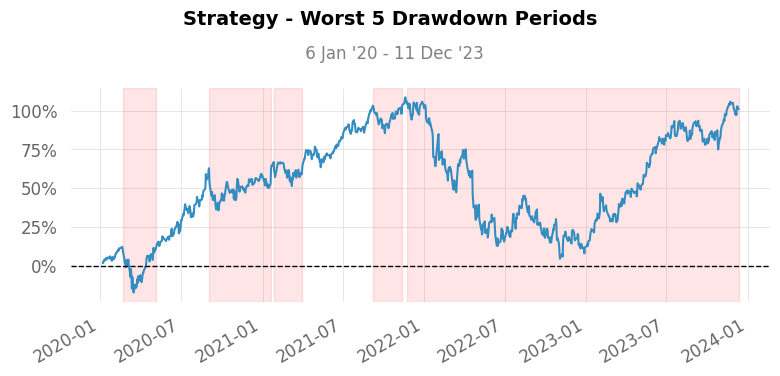

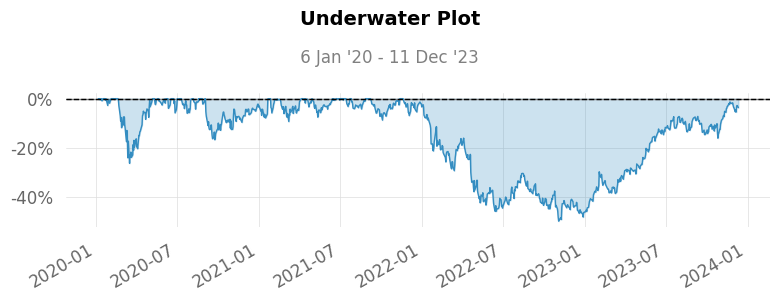

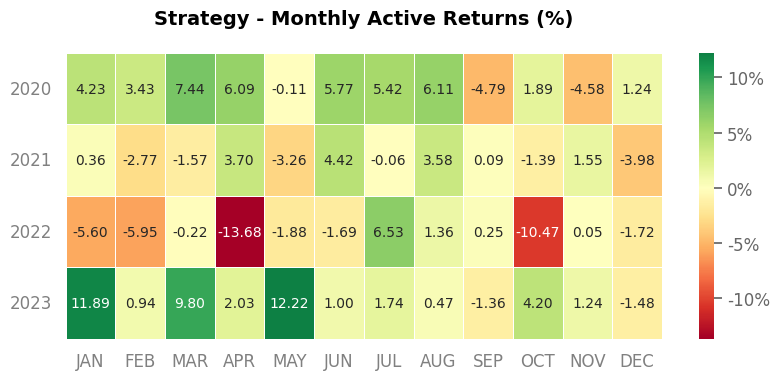

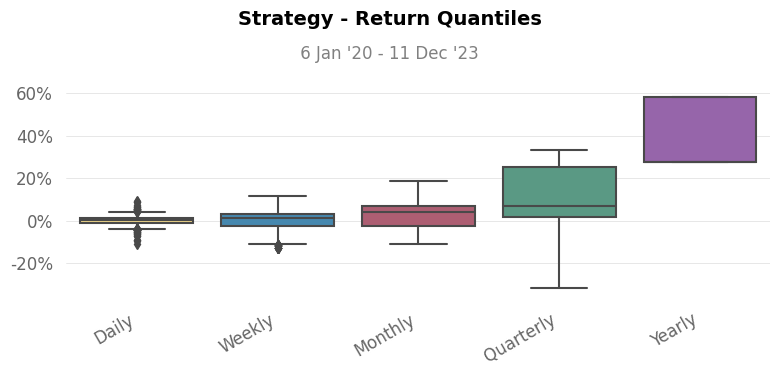

In [22]:
qs.reports.plots(portfolio_returns, benchmark="SPY", mode="full", prepare_returns=False)

In [24]:
#Finding the efficient frontier using Monte Carlo simulations
import yfinance as yf
import numpy as np
import pandas as pd

In [25]:
N_PORTFOLIOS = 10 ** 5
N_DAYS = 252
ASSETS = ["META", "TSLA", "AMZN", "MSFT"]
ASSETS.sort()

n_assets = len(ASSETS)

In [28]:
prices_df = yf.download(ASSETS,
                        start="2021-01-01",
                        end="2023-12-12")

[*********************100%%**********************]  4 of 4 completed


In [29]:
prices_df.head()

Adj Close                                           Close  \
                  AMZN        META        MSFT        TSLA        AMZN   
Date                                                                     
2021-01-04  159.331497  268.940002  211.996613  243.256668  159.331497   
2021-01-05  160.925507  270.970001  212.201111  245.036667  160.925507   
2021-01-06  156.919006  263.309998  206.698914  251.993332  156.919006   
2021-01-07  158.108002  268.739990  212.580917  272.013336  158.108002   
2021-01-08  159.134995  267.570007  213.876144  293.339996  159.134995   

                                                      High              ...  \
                  META        MSFT        TSLA        AMZN        META  ...   
Date                                                                    ...   
2021-01-04  268.940002  217.690002  243.256668  163.600006  275.000000  ...   
2021-01-05  270.970001  217.899994  245.036667  161.169006  272.399994  ...   
2021-01-06  263.309998  212.250000  251.993332  159.875504  267.750000  ...   
2021-01-07  268.739990  218.289993  272.013336  160.427002  271.609985  ...   
2021-01-08  267.570007  219.619995  293.339996  159.531998  268.950012  ...   

                   Low                    Open                          \
                  MSFT        TSLA        AMZN        META        MSFT   
Date                                                                     
2021-01-04  214.809998  239.063339  163.500000  274.779999  222.529999   
2021-01-05  215.699997  239.733337  158.300507  268.290009  217.259995   
2021-01-06  211.940002  249.699997  157.324005  262.000000  212.169998   
2021-01-07  213.710007  258.399994  157.850006  265.899994  214.039993   
2021-01-08  217.029999  279.463318  159.000000  268.309998  218.679993   

                          Volume                                 
                  TSLA      AMZN      META      MSFT       TSLA  
Date                                                             
2021-01-04  239.820007  88228000  15106100  37130100  145914600  
2021-01-05  241.220001  53110000   9871600  23823000   96735600  
2021-01-06  252.830002  87896000  24354100  35930700  134100000  
2021-01-07  259.209991  70290000  15789800  27694500  154496700  
2021-01-08  285.333344  70754000  18528300  22956200  225166500  

[5 rows x 24 columns]

In [30]:
prices_df.tail()

Adj Close                                           Close  \
                  AMZN        META        MSFT        TSLA        AMZN   
Date                                                                     
2023-12-05  146.880005  318.290009  372.519989  238.720001  146.880005   
2023-12-06  144.520004  317.450012  368.799988  239.369995  144.520004   
2023-12-07  146.880005  326.589996  370.950012  242.639999  146.880005   
2023-12-08  147.419998  332.750000  374.230011  243.839996  147.419998   
2023-12-11  145.889999  325.279999  371.299988  239.740005  145.889999   

                                                      High              ...  \
                  META        MSFT        TSLA        AMZN        META  ...   
Date                                                                    ...   
2023-12-05  318.290009  372.519989  238.720001  148.570007  321.880005  ...   
2023-12-06  317.450012  368.799988  239.369995  147.850006  322.250000  ...   
2023-12-07  326.589996  370.950012  242.639999  147.919998  328.239990  ...   
2023-12-08  332.750000  374.230011  243.839996  147.839996  333.170013  ...   
2023-12-11  325.279999  371.299988  239.740005  146.190002  329.890015  ...   

                   Low                    Open                          \
                  MSFT        TSLA        AMZN        META        MSFT   
Date                                                                     
2023-12-05  365.619995  233.699997  143.550003  318.980011  366.450012   
2023-12-06  368.029999  239.169998  147.580002  321.929993  373.540009   
2023-12-07  366.320007  236.979996  146.149994  317.769989  368.230011   
2023-12-08  368.230011  239.270004  145.479996  323.089996  369.200012   
2023-12-11  366.100006  237.449997  145.660004  329.399994  368.480011   

                          Volume                                 
                  TSLA      AMZN      META      MSFT       TSLA  
Date                                                             
2023-12-05  233.869995  46822400  16952100  23065000  137971100  
2023-12-06  242.919998  39679000  11294300  21182100  126436200  
2023-12-07  241.550003  52352800  15905100  23118900  107142300  
2023-12-08  240.270004  41858000  14077500  20144800  102980100  
2023-12-11  242.740005  50907300  25802500  27708800   97913900  

[5 rows x 24 columns]

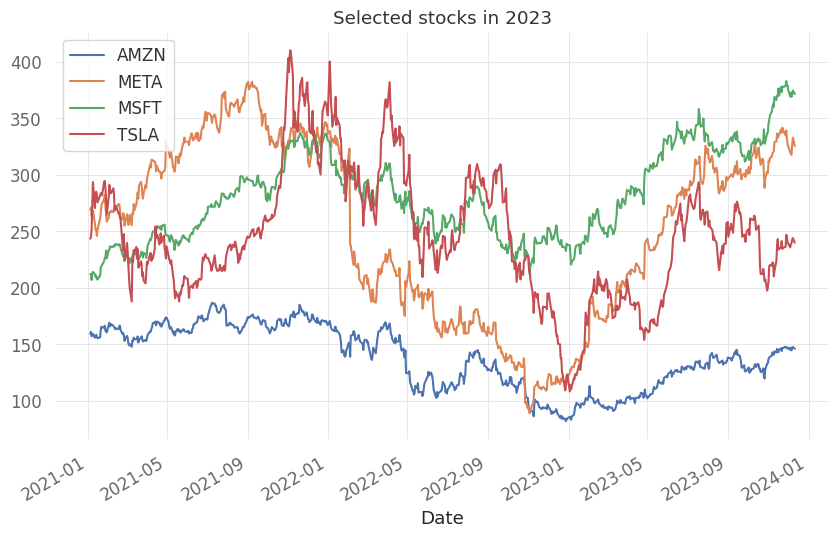

In [31]:
prices_df["Adj Close"].plot(title="Selected stocks in 2023");

In [32]:
returns_df = prices_df["Adj Close"].pct_change().dropna()

avg_returns = returns_df.mean() * N_DAYS
cov_mat = returns_df.cov() * N_DAYS

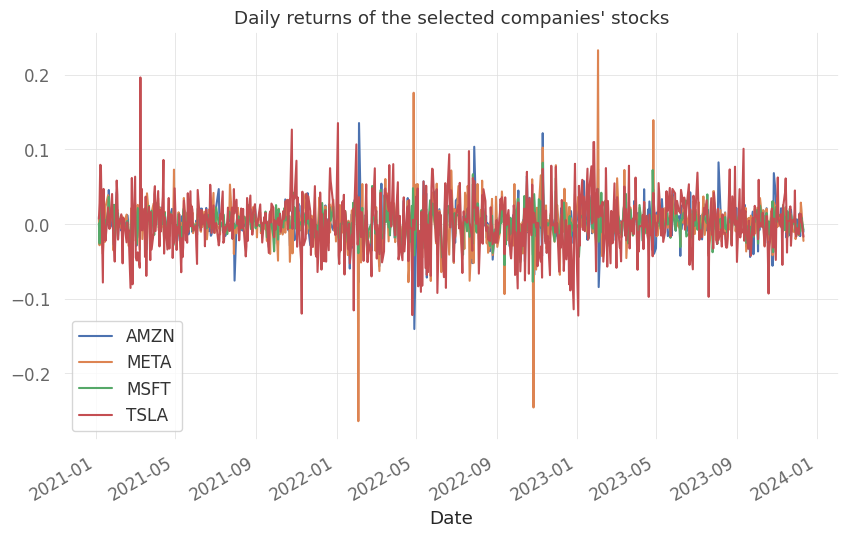

In [33]:
returns_df.plot(title="Daily returns of the selected companies' stocks");

In [34]:
np.random.seed(42)
weights = np.random.random(size=(N_PORTFOLIOS, n_assets))
weights /=  np.sum(weights, axis=1)[:, np.newaxis]

In [35]:
portf_rtns = np.dot(weights, avg_returns)

portf_vol = []
for i in range(0, len(weights)):
    vol = np.sqrt(
        np.dot(weights[i].T, np.dot(cov_mat, weights[i]))
    )
    portf_vol.append(vol)
portf_vol = np.array(portf_vol)

portf_sharpe_ratio = portf_rtns / portf_vol

In [36]:
portf_results_df = pd.DataFrame(
    {"returns": portf_rtns,
     "volatility": portf_vol,
     "sharpe_ratio": portf_sharpe_ratio}
)
portf_results_df

returns  volatility  sharpe_ratio
0      0.171936    0.345192      0.498088
1      0.157664    0.473650      0.332871
2      0.139754    0.401061      0.348460
3      0.102951    0.341507      0.301459
4      0.164798    0.337911      0.487696
...         ...         ...           ...
99995  0.188111    0.345859      0.543895
99996  0.145146    0.401761      0.361273
99997  0.162367    0.325068      0.499486
99998  0.154682    0.340339      0.454495
99999  0.180847    0.326865      0.553278

[100000 rows x 3 columns]

In [37]:
N_POINTS = 100

ef_rtn_list = []
ef_vol_list = []

possible_ef_rtns = np.linspace(
    portf_results_df["returns"].min(),
    portf_results_df["returns"].max(),
    N_POINTS
)
possible_ef_rtns = np.round(possible_ef_rtns, 2)
portf_rtns = np.round(portf_rtns, 2)

for rtn in possible_ef_rtns:
    if rtn in portf_rtns:
        ef_rtn_list.append(rtn)
        matched_ind = np.where(portf_rtns == rtn)
        ef_vol_list.append(np.min(portf_vol[matched_ind]))

In [38]:
#Plot the Efficient Frontier

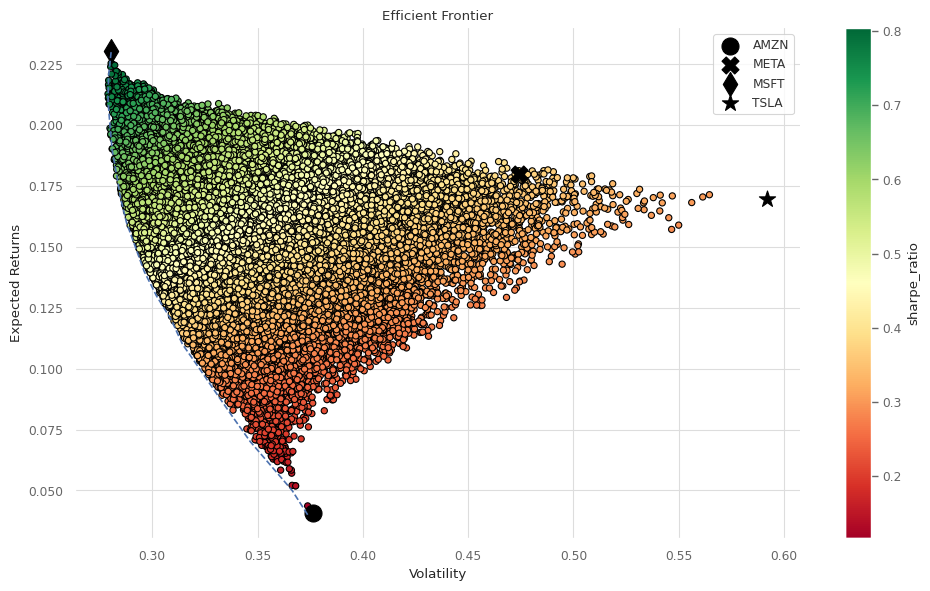

In [47]:
MARKERS = ["o", "X", "d", "*"]

with sns.plotting_context("paper"):
    fig, ax = plt.subplots()
    portf_results_df.plot(kind="scatter", x="volatility",
                          y="returns", c="sharpe_ratio",
                          cmap="RdYlGn", edgecolors="black",
                          ax=ax)
    ax.set(xlabel="Volatility",
           ylabel="Expected Returns",
           title="Efficient Frontier")
    ax.plot(ef_vol_list, ef_rtn_list, "b--")
    for asset_index in range(n_assets):
        ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]),
                   y=avg_returns[asset_index],
                   marker=MARKERS[asset_index],
                   s=150, color="black",
                   label=ASSETS[asset_index])
    ax.legend()

    sns.despine()
    plt.tight_layout()
    # plt.savefig("images/figure_11_10", dpi=200)

In [40]:
#QuantStats: Portfolio analytics for quants
#QuantStats Python library that performs portfolio profiling, allowing quants and portfolio managers to understand their performance better by providing them with in-depth analytics and risk metrics.
#QuantStats is comprised of 3 main modules:
#quantstats.stats - for calculating various performance metrics, like Sharpe ratio, Win rate, Volatility, etc.

#quantstats.plots - for visualizing performance, drawdowns, rolling statistics, monthly returns, etc.

#quantstats.reports - for generating metrics reports, batch plotting, and creating tear sheets that can be saved as an HTML file.

In [41]:
pip install quantstats

In [42]:
import quantstats as qs
import tempfile
from IPython.display import display, HTML


In [43]:
# extend pandas functionality with metrics, etc.
qs.extend_pandas()

# fetch the daily returns for a stock
stock = qs.utils.download_returns('META')

# show sharpe ratio
qs.stats.sharpe(stock)

# or using extend_pandas() :)
stock.sharpe()

[*********************100%%**********************]  1 of 1 completed


0.668016535951623

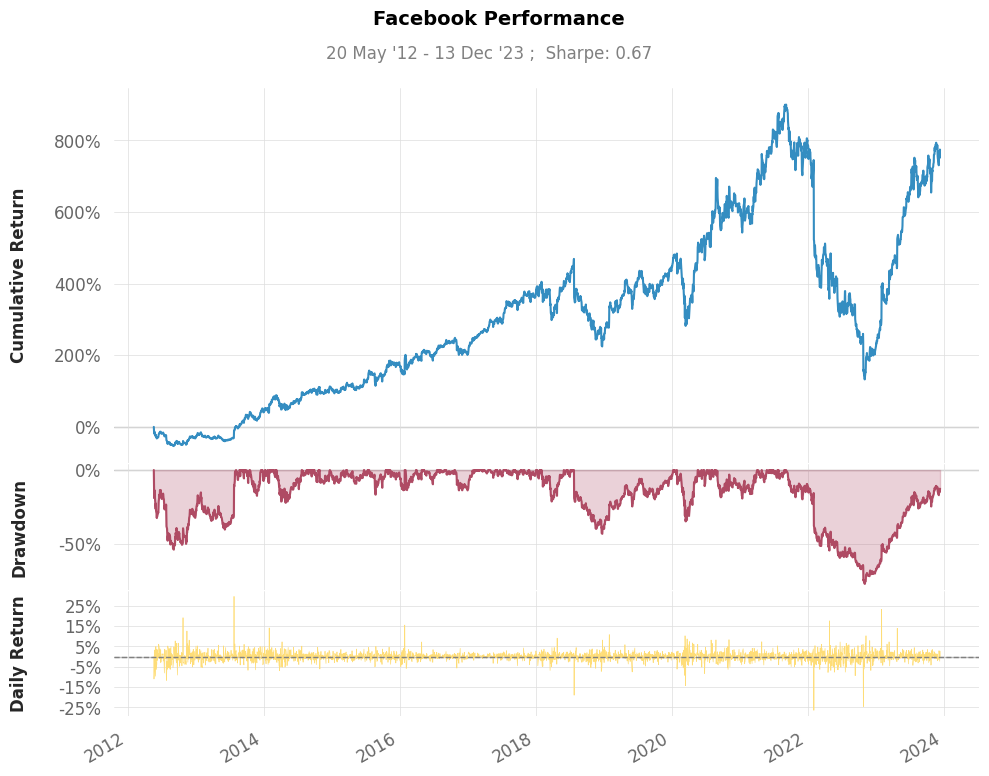

In [44]:
#Visualize stock performance
qs.plots.snapshot(stock, title='Facebook Performance', show=True)

# can also be called via:
# stock.plot_snapshot(title='Facebook Performance', show=True)

In [45]:
# Generate an HTML performance report with SPY as the benchmark
output_path = tempfile.mktemp(suffix=".html")
qs.reports.html(stock, "SPY", output=output_path)

[*********************100%%**********************]  1 of 1 completed


In [46]:
# Display the HTML report in the notebook
with open(output_path, "r") as f:
    display(HTML(f.read()))